In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

In [2]:
import sqlite3
conn = sqlite3.connect("Pharm_Data.db")
cursor = conn.cursor()

In [3]:
query = "SELECT * FROM FactSales"
factsales = pd.read_sql_query(query, conn)
factsales.head()

,Distributor,Channel,Sub_channel,Quantity,Price,Sales,Month,Year,customer_id,location_id,productClass_id,SalesRep_id,SalesTeam_id,manager_id,product_id
0,Gottlieb-Cruickshank,Hospital,Private,4,368,1472,January,2018,1,1,1,1,1,1,1
1,Gottlieb-Cruickshank,Pharmacy,Institution,2,368,736,January,2018,41,41,1,12,3,3,1
2,Gottlieb-Cruickshank,Pharmacy,Retail,7,591,4137,January,2018,2,2,2,2,1,1,2
3,Gottlieb-Cruickshank,Hospital,Private,4,591,2364,January,2018,38,38,2,12,3,3,2
4,Gottlieb-Cruickshank,Hospital,Private,3,311,933,January,2018,1,1,1,11,4,4,91


In [4]:
print(f'Data shape is: {factsales.shape}\n')
print(f'Data info is: {factsales.info()}')

Data shape is: (254082, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Distributor      254082 non-null  object
 1   Channel          254082 non-null  object
 2   Sub_channel      254082 non-null  object
 3   Quantity         254082 non-null  int64 
 4   Price            254082 non-null  int64 
 5   Sales            254082 non-null  int64 
 6   Month            254082 non-null  object
 7   Year             254082 non-null  int64 
 8   customer_id      254082 non-null  int64 
 9   location_id      254082 non-null  int64 
 10  productClass_id  254082 non-null  int64 
 11  SalesRep_id      254082 non-null  int64 
 12  SalesTeam_id     254082 non-null  int64 
 13  manager_id       254082 non-null  int64 
 14  product_id       254082 non-null  int64 
dtypes: int64(11), object(4)
memory usage: 29.1+ MB
Data info is: None


In [5]:
factsales.dtypes

Distributor        object
Channel            object
Sub_channel        object
Quantity            int64
Price               int64
Sales               int64
Month              object
Year                int64
customer_id         int64
location_id         int64
productClass_id     int64
SalesRep_id         int64
SalesTeam_id        int64
manager_id          int64
product_id          int64
dtype: object

In [6]:
print(f'Data columns are: {factsales.columns}\n')
print(f'Data statistical description is: {factsales.describe(include= 'int64')}')

Data columns are: Index(['Distributor', 'Channel', 'Sub_channel', 'Quantity', 'Price', 'Sales',
       'Month', 'Year', 'customer_id', 'location_id', 'productClass_id',
       'SalesRep_id', 'SalesTeam_id', 'manager_id', 'product_id'],
      dtype='object')

Data statistical description is:             Quantity          Price         Sales           Year  \
count  254082.000000  254082.000000  2.540820e+05  254082.000000   
mean      115.685731     412.207720  4.759073e+04    2018.385187   
std       743.878274     224.963687  3.490366e+05       1.041352   
min         0.000000      22.000000  0.000000e+00    2017.000000   
25%         5.000000     195.000000  1.800000e+03    2018.000000   
50%        20.000000     430.000000  6.040000e+03    2018.000000   
75%        50.000000     605.000000  2.225000e+04    2019.000000   
max    117600.000000     794.000000  7.420560e+07    2020.000000   

         customer_id    location_id  productClass_id    SalesRep_id  \
count  254082.000000  25

In [7]:
factsales.isnull().sum()

Distributor        0
Channel            0
Sub_channel        0
Quantity           0
Price              0
Sales              0
Month              0
Year               0
customer_id        0
location_id        0
productClass_id    0
SalesRep_id        0
SalesTeam_id       0
manager_id         0
product_id         0
dtype: int64

In [8]:
factsales.nunique()

Distributor           29
Channel                2
Sub_channel            4
Quantity            1412
Price                210
Sales              18749
Month                 12
Year                   4
customer_id          751
location_id          751
productClass_id        6
SalesRep_id           13
SalesTeam_id           4
manager_id             4
product_id           240
dtype: int64

In [9]:
factsales.isna()

,Distributor,Channel,Sub_channel,Quantity,Price,Sales,Month,Year,customer_id,location_id,productClass_id,SalesRep_id,SalesTeam_id,manager_id,product_id
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254077,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
254078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
254079,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
254080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Checking for dupilicate
factsales.duplicated().sum()


4

In [11]:
# Removinf dupllicate and re checking duplicate
sales = factsales.drop_duplicates()
sales.duplicated().sum()


0

#### Step Explore relationships and outliers


<Axes: xlabel='Price', ylabel='Quantity'>

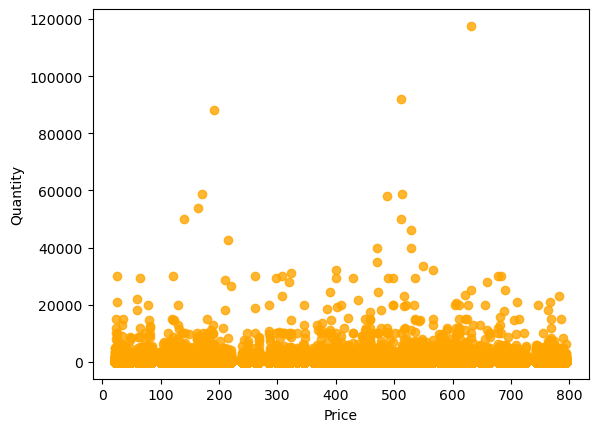

In [12]:
# sns.boxplot(x = sales['Sales'])
sns.regplot(x = sales['Price'], y = sales['Quantity'], color= 'Orange')



In [14]:
# Removing outliers
sales_df = sales.drop(sales[sales['Quantity']>60000].index)

<Axes: xlabel='Price', ylabel='Quantity'>

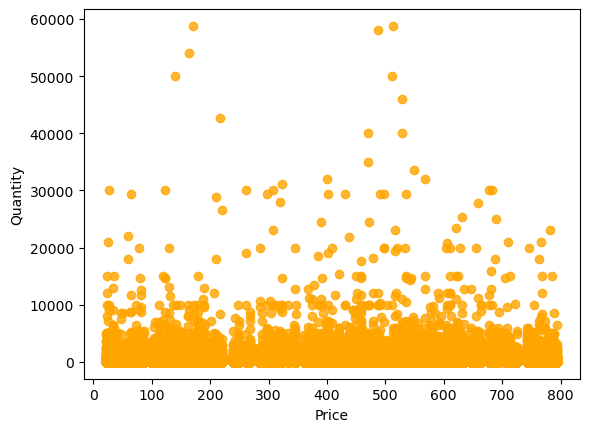

In [15]:
# Re-checking outliers
sns.regplot(x = sales_df['Price'], y = sales_df['Quantity'], color= 'Orange')

<Axes: >

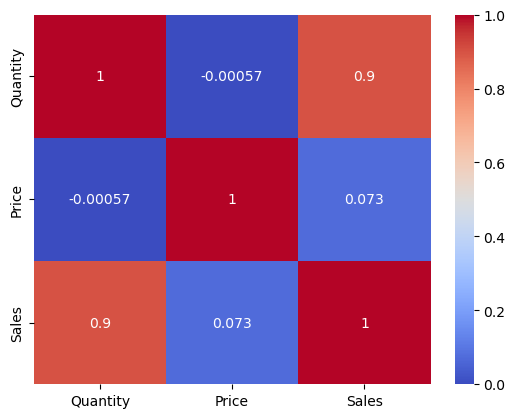

In [16]:
corr_df = sales.iloc[:,3:6]
corr_df
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')


In [17]:
Q1 = sales['Quantity'].quantile(0.25)
Q3 = sales['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = sales[(sales['Quantity'] < lower_bound) | (sales['Quantity'] > upper_bound)]
outliers.head()



,Distributor,Channel,Sub_channel,Quantity,Price,Sales,Month,Year,customer_id,location_id,productClass_id,SalesRep_id,SalesTeam_id,manager_id,product_id
104,Gottlieb-Cruickshank,Pharmacy,Retail,180,458,82440,January,2018,7,7,2,11,4,4,133
125,Gottlieb-Cruickshank,Hospital,Private,180,682,122760,January,2018,9,9,3,9,3,3,59
131,Gottlieb-Cruickshank,Hospital,Government,250,424,106000,January,2018,50,50,2,8,2,2,51
171,Gottlieb-Cruickshank,Hospital,Private,150,82,12300,January,2018,15,15,6,6,1,1,227
198,Gottlieb-Cruickshank,Pharmacy,Institution,300,141,42300,January,2018,30,30,5,13,4,4,102


In [18]:
query = "SELECT * FROM dimcustomers"
customers = pd.read_sql_query(query, conn)
customers.head()

,customer_id,Customer_Name,location_id
0,1,"Zieme, Doyle and Kunze",1
1,2,Feest PLC,2
2,3,Medhurst-Beer Pharmaceutical Limited,3
3,4,Barton Ltd Pharma Plc,4
4,5,Keeling LLC Pharmacy,5


In [19]:
customers.dtypes

customer_id       int64
Customer_Name    object
location_id       int64
dtype: object

In [20]:
query = "SELECT * FROM dimlocation"
region= pd.read_sql_query(query, conn)
region.head()

,location_id,City,Country,Latitude,Longitude
0,1,Lublin,Poland,51.2333,22.5667
1,2,?wiecie,Poland,53.4167,18.4333
2,3,Rybnik,Poland,50.0833,18.5000
3,4,Czelad?,Poland,50.3333,19.0833
4,5,Olsztyn,Poland,53.7800,20.4942


In [22]:
region.dtypes

location_id      int64
City            object
Country         object
Latitude       float64
Longitude      float64
dtype: object

In [23]:
query = "SELECT * FROM dimproductclass"
productclass = pd.read_sql_query(query, conn)
productclass.head()

,productClass_id,Product_Class
0,1,Mood Stabilizers
1,2,Antibiotics
2,3,Analgesics
3,4,Antiseptics
4,5,Antipiretics


In [24]:
productclass.dtypes

productClass_id     int64
Product_Class      object
dtype: object

In [25]:
query = "SELECT * FROM dimproducts"
products = pd.read_sql_query(query, conn)
products.head()

,product_id,Product_Name
0,1,Topipizole
1,2,Choriotrisin
2,3,Acantaine
3,4,Lioletine Refliruvax
4,5,Oxymotroban Fexoformin


In [26]:
products.dtypes

product_id       int64
Product_Name    object
dtype: object

In [27]:
query = "SELECT * FROM dimsalesrep"
salesrep = pd.read_sql_query(query, conn)
salesrep.head()

,SalesRep_id,SalesRep
0,1,Mary Gerrard
1,2,Jessica Smith
2,3,Steve Pepple
3,4,Anne Wu
4,5,Thompson Crawford


In [28]:
salesrep.dtypes

SalesRep_id     int64
SalesRep       object
dtype: object

In [29]:
query = "SELECT * FROM dimsalesteam"
salesteam = pd.read_sql_query(query, conn)
salesteam.head()

,SalesTeam_id,SalesTeam
0,1,Delta
1,2,Bravo
2,3,Alfa
3,4,Charlie


In [30]:
salesteam.dtypes

SalesTeam_id     int64
SalesTeam       object
dtype: object

In [31]:
query = "SELECT * FROM dimsalesteammanager"
salesteammanager = pd.read_sql_query(query, conn)
salesteammanager.head()

,manager_id,Manager
0,1,Britanny Bold
1,2,Tracy Banks
2,3,James Goodwill
3,4,Alisha Cordwell


In [32]:
salesteammanager.dtypes

manager_id     int64
Manager       object
dtype: object

### Sales Data Analysis

#### Sales by Year, products and Region

In [42]:
sales_df

,Distributor,Channel,Sub_channel,Quantity,Price,Sales,Month,Year,customer_id,location_id,productClass_id,SalesRep_id,SalesTeam_id,manager_id,product_id
0,Gottlieb-Cruickshank,Hospital,Private,4,368,1472,January,2018,1,1,1,1,1,1,1
1,Gottlieb-Cruickshank,Pharmacy,Institution,2,368,736,January,2018,41,41,1,12,3,3,1
2,Gottlieb-Cruickshank,Pharmacy,Retail,7,591,4137,January,2018,2,2,2,2,1,1,2
3,Gottlieb-Cruickshank,Hospital,Private,4,591,2364,January,2018,38,38,2,12,3,3,2
4,Gottlieb-Cruickshank,Hospital,Private,3,311,933,January,2018,1,1,1,11,4,4,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254077,Bashirian-Kassulke,Hospital,Private,919,497,456743,December,2020,624,624,2,5,3,3,60
254078,Bashirian-Kassulke,Hospital,Private,432,681,294192,December,2020,535,535,4,4,1,1,100
254079,Bashirian-Kassulke,Pharmacy,Retail,320,678,216960,December,2020,596,596,1,10,2,2,221
254080,Bashirian-Kassulke,Hospital,Government,565,115,64975,December,2020,512,512,1,7,4,4,162


In [43]:
# Sales by year
sales_by_year_merged = sales_df.groupby('Year')['Sales'].sum()
sales_by_year_df = pd.DataFrame(sales_by_year_merged)
sales_by_year_df.reset_index(inplace= True)
sales_by_year_df['Year'] = sales_by_year_df['Year'].round(0)
sales_by_year_df

,Year,Sales
0,2017,2734378251
1,2018,3584297596
2,2019,2904773411
3,2020,2730423779


In [44]:
# Sales by Products

sales_products_merged = pd.merge(sales_df, products, on = 'product_id')
sales_by_product =sales_products_merged.groupby('Product_Name')['Sales'].sum()
sales_by_product_df = pd.DataFrame(sales_by_product)
sales_by_product_df.reset_index(inplace=True)
sales_by_product_df

,Product_Name,Sales
0,Abatatriptan,79992052
1,Abilovir Aprotasol,35798090
2,Abobozolid,7680900
3,Abranatal Lysoprosate,86937822
4,Abtasol,89645322
...,...,...
235,Zithrotrol,14619955
236,Zonitonin,51403730
237,Zonixamine Immulinum,50689204
238,Zynosine,7873822


In [45]:
# Sales by Regon
sales_region_merged = pd.merge(sales_df, region, on = 'location_id' )
sales_by_region = sales_region_merged.groupby('Country')['Sales'].sum()
sales_by_region_df = pd.DataFrame(sales_by_region)
sales_by_region_df.reset_index(inplace= True)
sales_by_region_df


,Country,Sales
0,Germany,11272635637
1,Poland,681237400


Yearly Sales Trend

<Axes: xlabel='Year', ylabel='Sales'>

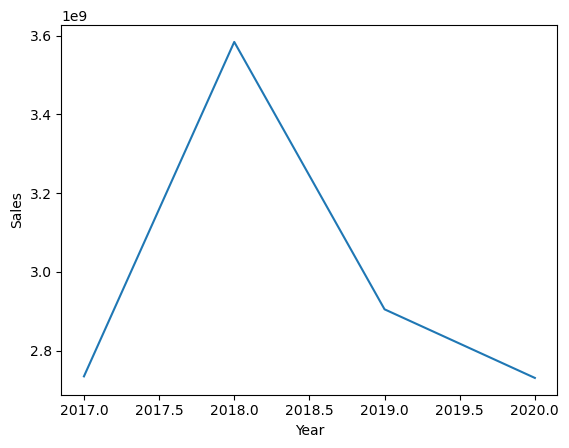

In [203]:
# sales trend by year
sns.lineplot(x= 'Year', y= 'Sales', data = sales_by_year_df )

##### Customer Demographics and Purchasing Patterns

In [178]:
sales_by_region = sales_by_region_df.groupby('Country')['Sales'].sum()
customer_demography = pd.DataFrame(sales_by_region)
customer_demography.reset_index(inplace= True)
customer_demography



,Country,Sales
0,Germany,11272635637
1,Poland,681237400


<Axes: xlabel='Country'>

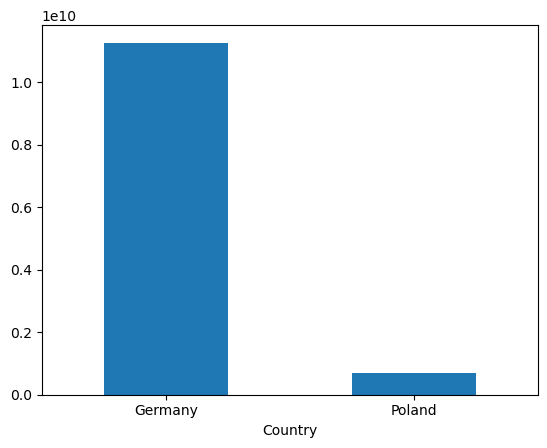

In [202]:
customer_demography.plot(kind = 'bar', x= 'Country', y= 'Sales', rot =0, legend= False)


Time Series Purhases

In [116]:
product_sales_merged = pd.merge(productclass, sales_df, on = 'productClass_id')
product_sales_merged

,productClass_id,Product_Class,Distributor,Channel,Sub_channel,Quantity,Price,Sales,Month,Year,customer_id,location_id,SalesRep_id,SalesTeam_id,manager_id,product_id
0,1,Mood Stabilizers,Gottlieb-Cruickshank,Hospital,Private,4,368,1472,January,2018,1,1,1,1,1,1
1,1,Mood Stabilizers,Gottlieb-Cruickshank,Pharmacy,Institution,2,368,736,January,2018,41,41,12,3,3,1
2,1,Mood Stabilizers,Gottlieb-Cruickshank,Hospital,Private,3,311,933,January,2018,1,1,11,4,4,91
3,1,Mood Stabilizers,Gottlieb-Cruickshank,Pharmacy,Institution,2,106,212,January,2018,3,3,11,4,4,40
4,1,Mood Stabilizers,Gottlieb-Cruickshank,Hospital,Private,5,106,530,January,2018,39,39,11,4,4,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254070,6,Antimalarial,Koss,Hospital,Government,50,195,9750,December,2020,511,511,11,4,4,224
254071,6,Antimalarial,Koss,Pharmacy,Institution,280,149,41720,December,2020,557,557,13,4,4,49
254072,6,Antimalarial,Koss,Pharmacy,Retail,10,408,4080,December,2020,612,612,11,4,4,112
254073,6,Antimalarial,Koss,Pharmacy,Institution,20,112,2240,December,2020,308,308,7,4,4,229


<Axes: xlabel='Product_Class'>

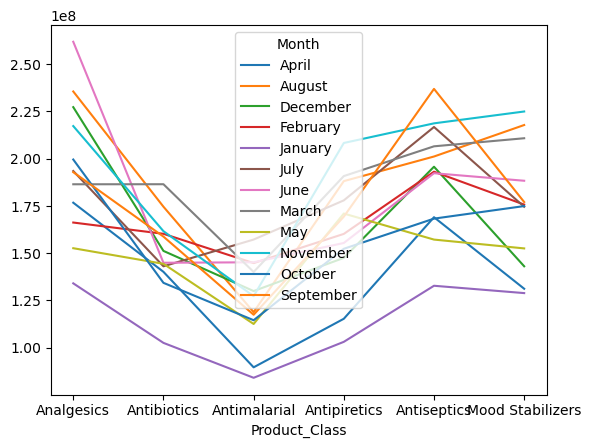

In [ ]:
# Product sales trend by Month
product_sales = product_sales_merged.groupby(['Product_Class', 'Month'])['Sales'].sum().unstack()
product_sales.plot()


Top Performing Products

In [161]:
top_products = product_sales_merged.groupby('Product_Class')['Sales'].sum().sort_values(ascending=False).head(10)
top_products_df = pd.DataFrame(top_products)
top_products_df.reset_index(inplace= True)
top_products_df['Sales'] = top_products_df['Sales'].apply(lambda x:f"{x:,}")
top_products_df

,Product_Class,Sales
0,Analgesics,"2,343,964,136"
1,Antiseptics,"2,288,543,804"
2,Mood Stabilizers,"2,099,699,927"
3,Antipiretics,"1,939,003,231"
4,Antibiotics,"1,801,884,713"
5,Antimalarial,"1,480,777,226"
